**Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve, auc
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.metrics import mean_squared_error
from catboost import CatBoostClassifier, Pool, cv
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
import pickle
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

**Feature Engineering**

In [3]:
df = pd.read_csv('data/leads.csv')
# Drop Prospect ID and Lead Number for irrelevancy
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
df['TotalVisits'] = LabelEncoder().fit_transform(df['TotalVisits'])
df['Total Time Spent on Website'] = LabelEncoder().fit_transform(df['Total Time Spent on Website'])
df['Page Views Per Visit'] = LabelEncoder().fit_transform(df['Page Views Per Visit'])
df['Asymmetrique Activity Score'] = LabelEncoder().fit_transform(df['Asymmetrique Activity Score'])
df['Asymmetrique Profile Score'] = LabelEncoder().fit_transform(df['Asymmetrique Profile Score'])

target_variable = 'Converted'

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Convert non-numeric columns to numeric
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = pd.to_numeric(df_encoded[column], errors='coerce')

# Drop rows with missing values (NaNs) after conversion
df_encoded = df_encoded.dropna()

print(df_encoded.dtypes)

class_counts = df_encoded['Converted'].value_counts()
print("Class Counts:")
print(class_counts)

total_instances = len(df_encoded)

class_balances = class_counts / total_instances * 100
print("Class Balances:")
print(class_balances)

TotalVisits                                           int64
Total Time Spent on Website                           int64
Page Views Per Visit                                  int64
Asymmetrique Activity Score                           int64
Asymmetrique Profile Score                            int64
                                                      ...  
Last Notable Activity_Resubscribed to emails           bool
Last Notable Activity_SMS Sent                         bool
Last Notable Activity_Unreachable                      bool
Last Notable Activity_Unsubscribed                     bool
Last Notable Activity_View in browser link Clicked     bool
Length: 149, dtype: object
Class Counts:
Converted
0    5679
1    3561
Name: count, dtype: int64
Class Balances:
Converted
0    61.461039
1    38.538961
Name: count, dtype: float64


**Baseline Model - Linear Regression**

Accuracy: 0.8441558441558441

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1107
           1       0.82      0.78      0.80       741

    accuracy                           0.84      1848
   macro avg       0.84      0.83      0.84      1848
weighted avg       0.84      0.84      0.84      1848



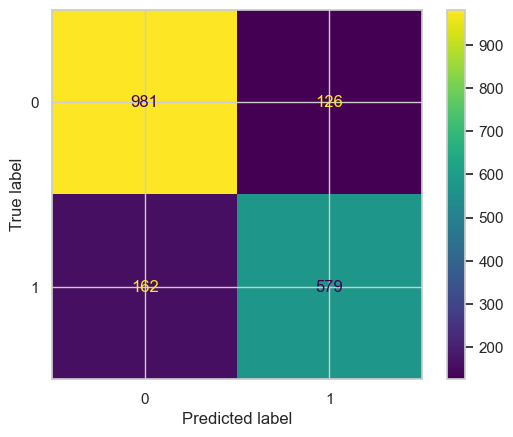

Mean Training Accuracy across 30 bootstraps: 0.8513843795093795
Mean Test Accuracy across 30 bootstraps: 0.8470238095238096
Mean Training Precision across 30 bootstraps: 0.8288173900406323
Mean Test Precision across 30 bootstraps: 0.8281408937701532
Mean Training Recall across 30 bootstraps: 0.7695153664302602
Mean Test Recall across 30 bootstraps: 0.7806567701304542
Mean Squared Error on Training Accuracy across 30 bootstraps: 0.022111893102913796
Mean Squared Error on Test Accuracy across 30 bootstraps: 0.023447787632040876
Mean Squared Error on Training Precision across 30 bootstraps: 0.02939646076990717
Mean Squared Error on Test Precision across 30 bootstraps: 0.029646630574079912
Mean Squared Error on Training Recall across 30 bootstraps: 0.05326012692185168
Mean Squared Error on Test Recall across 30 bootstraps: 0.04837792602548621
Cross-Validation Scores: [0.8647735  0.85260311 0.83964817 0.85520974 0.84709066]
Mean CV Score: 0.8518650369951537
Mean Squared Error on Holdout Set

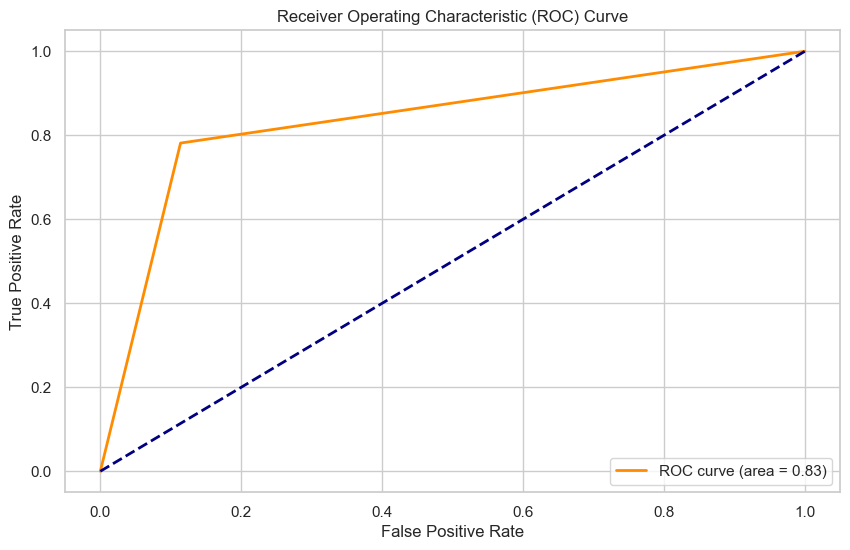

AUC-ROC: 0.8337776900036208


In [4]:
## Baseline model Linear Regression

df = pd.read_csv('data/leads.csv')
# Drop Prospect ID and Lead Number for irrelevancy
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
df['TotalVisits'] = LabelEncoder().fit_transform(df['TotalVisits'])
df['Total Time Spent on Website'] = LabelEncoder().fit_transform(df['Total Time Spent on Website'])
df['Page Views Per Visit'] = LabelEncoder().fit_transform(df['Page Views Per Visit'])
df['Asymmetrique Activity Score'] = LabelEncoder().fit_transform(df['Asymmetrique Activity Score'])
df['Asymmetrique Profile Score'] = LabelEncoder().fit_transform(df['Asymmetrique Profile Score'])

target_variable = 'Converted'

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Convert non-numeric columns to numeric
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = pd.to_numeric(df_encoded[column], errors='coerce')

# Drop rows with missing values (NaNs) after conversion
df_encoded = df_encoded.dropna()

# Split the data into features and target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
conf_matrix.plot()
plt.show()

## Bootstrapping

# Number of bootstrap samples
num_bootstraps = 30

# Initialize empty lists to store accuracy and recall values for training and test sets
train_accuracy_values = []
mse_train_accuracy_values = []
train_recall_values = []
mse_train_recall_values = []
test_accuracy_values = []
mse_test_accuracy_values = []
test_recall_values = []
mse_test_recall_values = []
train_precision_values = []
mse_train_precision_values = []
test_precision_values = []
mse_test_precision_values = []

# Bootstrap loop
for _ in range(num_bootstraps):
    # Create a bootstrap sample for training
    bootstrap_sample_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_bootstrap_train = X_train.iloc[bootstrap_sample_indices]
    y_bootstrap_train = y_train.iloc[bootstrap_sample_indices]

    model.fit(X_bootstrap_train, y_bootstrap_train)

    # Evaluate the model on the fixed training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    mse_train_accuracy = mean_squared_error([train_accuracy], [1])
    train_recall = recall_score(y_train, y_train_pred)
    mse_train_recall = mean_squared_error([train_recall], [1])
    train_accuracy_values.append(train_accuracy)
    mse_train_accuracy_values.append(mse_train_accuracy)
    train_recall_values.append(train_recall)
    mse_train_recall_values.append(mse_train_recall)
    train_precision = precision_score(y_train, y_train_pred)
    mse_train_precision = mean_squared_error([train_precision], [1])
    train_precision_values.append(train_precision)
    mse_train_precision_values.append(mse_train_precision)

    # Evaluate the model on the fixed test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    mse_test_accuracy = mean_squared_error([test_accuracy], [1])
    test_recall = recall_score(y_test, y_test_pred)
    mse_test_recall = mean_squared_error([test_recall], [1])
    test_accuracy_values.append(test_accuracy)
    mse_test_accuracy_values.append(mse_test_accuracy)
    test_recall_values.append(test_recall)
    mse_test_recall_values.append(mse_test_recall)
    test_precision = precision_score(y_test, y_test_pred)
    mse_test_precision = mean_squared_error([test_precision], [1])
    test_precision_values.append(test_precision)
    mse_test_precision_values.append(mse_test_precision)

# Calculate means for training and test sets
mean_train_accuracy = np.mean(train_accuracy_values)
mse_mean_train_accuracy = np.mean(mse_train_accuracy_values)
mean_train_recall = np.mean(train_recall_values)
mse_mean_train_recall = np.mean(mse_train_recall_values)
mean_test_accuracy = np.mean(test_accuracy_values)
mse_mean_test_accuracy = np.mean(mse_test_accuracy_values)
mean_test_recall = np.mean(test_recall_values)
mse_mean_test_recall = np.mean(mse_test_recall_values)
mean_train_precision = np.mean(train_precision_values)
mse_mean_train_precision = np.mean(mse_train_precision_values)
mean_test_precision = np.mean(test_precision_values)
mse_mean_test_precision = np.mean(mse_test_precision_values)


print(f"Mean Training Accuracy across {num_bootstraps} bootstraps: {mean_train_accuracy}")
print(f"Mean Test Accuracy across {num_bootstraps} bootstraps: {mean_test_accuracy}")
print(f"Mean Training Precision across {num_bootstraps} bootstraps: {mean_train_precision}")
print(f"Mean Test Precision across {num_bootstraps} bootstraps: {mean_test_precision}")
print(f"Mean Training Recall across {num_bootstraps} bootstraps: {mean_train_recall}")
print(f"Mean Test Recall across {num_bootstraps} bootstraps: {mean_test_recall}")
print(f"Mean Squared Error on Training Accuracy across {num_bootstraps} bootstraps: {mse_mean_train_accuracy}")
print(f"Mean Squared Error on Test Accuracy across {num_bootstraps} bootstraps: {mse_mean_test_accuracy}")
print(f"Mean Squared Error on Training Precision across {num_bootstraps} bootstraps: {mse_mean_train_precision}")
print(f"Mean Squared Error on Test Precision across {num_bootstraps} bootstraps: {mse_mean_test_precision}")
print(f"Mean Squared Error on Training Recall across {num_bootstraps} bootstraps: {mse_mean_train_recall}")
print(f"Mean Squared Error on Test Recall across {num_bootstraps} bootstraps: {mse_mean_test_recall}")

from sklearn.model_selection import StratifiedKFold, cross_val_score

## K-Fold CV

k_folds = 5
stratified_cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=stratified_cv, scoring='accuracy')

# Print or use the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

## Validation with holdout data set

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the holdout set
y_pred_holdout = model.predict(X_holdout)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the holdout set
mse_holdout = mean_squared_error(y_holdout, y_pred_holdout)
print(f'Mean Squared Error on Holdout Set: {mse_holdout}')

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error on Training Set: {mse_train}')

## Area under the curve/ROC

# Assuming 'y_true' contains true labels and 'y_scores' contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC-ROC:', roc_auc)

**Random Forest**

Accuracy: 0.8593073593073594

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      1107
           1       0.88      0.75      0.81       741

    accuracy                           0.86      1848
   macro avg       0.86      0.84      0.85      1848
weighted avg       0.86      0.86      0.86      1848



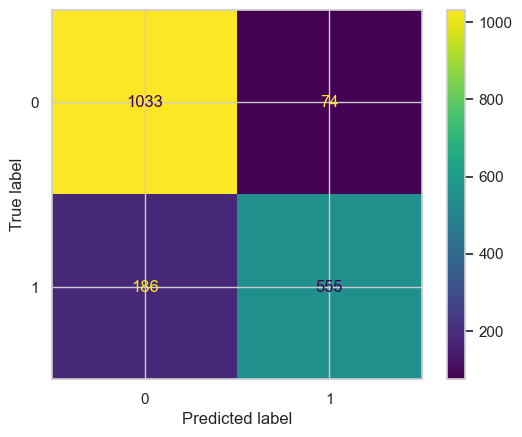

Mean Training Accuracy across 30 bootstraps: 0.8724386724386723
Mean Test Accuracy across 30 bootstraps: 0.8594155844155844
Mean Training Precision across 30 bootstraps: 0.9053929348715555
Mean Test Precision across 30 bootstraps: 0.8885485274235176
Mean Training Recall across 30 bootstraps: 0.7433687943262413
Mean Test Recall across 30 bootstraps: 0.7426450742240215
Mean Squared Error on Training Accuracy across 30 bootstraps: 0.016279298034066702
Mean Squared Error on Test Accuracy across 30 bootstraps: 0.019770310557648225
Mean Squared Error on Training Precision across 30 bootstraps: 0.008982633274229969
Mean Squared Error on Test Precision across 30 bootstraps: 0.012476897496957242
Mean Squared Error on Training Recall across 30 bootstraps: 0.06594484264708347
Mean Squared Error on Test Recall across 30 bootstraps: 0.06629325485068079
Cross-Validation Scores: [0.88708587 0.86409736 0.8579161  0.86671177 0.85859269]
Mean CV Score: 0.8668807600498087
Mean Squared Error on Holdout Se

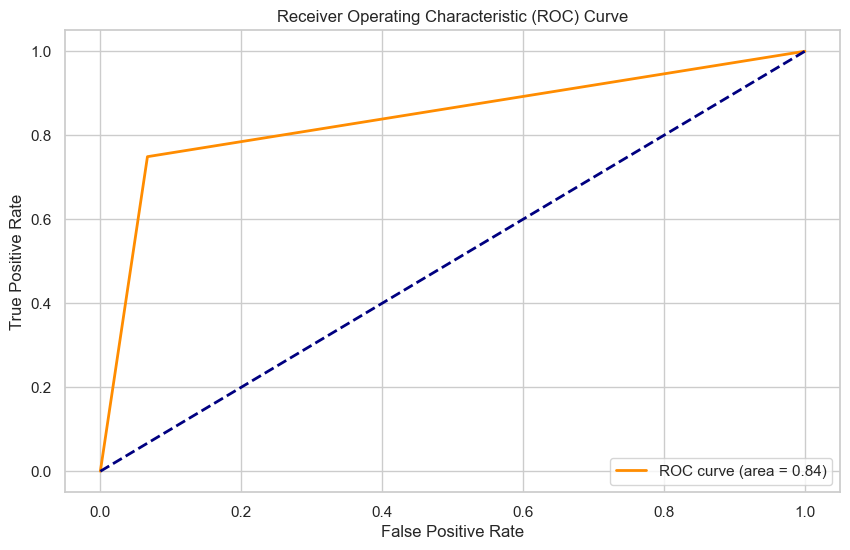

AUC-ROC: 0.8410702595554971


In [5]:
## Random Forest

df = pd.read_csv('data/leads.csv')
# Drop Prospect ID and Lead Number for irrelevancy
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
df['TotalVisits'] = LabelEncoder().fit_transform(df['TotalVisits'])
df['Total Time Spent on Website'] = LabelEncoder().fit_transform(df['Total Time Spent on Website'])
df['Page Views Per Visit'] = LabelEncoder().fit_transform(df['Page Views Per Visit'])
df['Asymmetrique Activity Score'] = LabelEncoder().fit_transform(df['Asymmetrique Activity Score'])
df['Asymmetrique Profile Score'] = LabelEncoder().fit_transform(df['Asymmetrique Profile Score'])

target_variable = 'Converted'

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Convert non-numeric columns to numeric
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = pd.to_numeric(df_encoded[column], errors='coerce')

# Drop rows with missing values (NaNs) after conversion
df_encoded = df_encoded.dropna()

# Split the data into features and target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train), 

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
conf_matrix.plot()
plt.show()

## Bootstrapping

# Number of bootstrap samples
num_bootstraps = 30

# Initialize empty lists to store accuracy and recall values for training and test sets
train_accuracy_values = []
mse_train_accuracy_values = []
train_recall_values = []
mse_train_recall_values = []
test_accuracy_values = []
mse_test_accuracy_values = []
test_recall_values = []
mse_test_recall_values = []
train_precision_values = []
mse_train_precision_values = []
test_precision_values = []
mse_test_precision_values = []

# Bootstrap loop
for _ in range(num_bootstraps):
    # Create a bootstrap sample for training
    bootstrap_sample_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_bootstrap_train = X_train.iloc[bootstrap_sample_indices]
    y_bootstrap_train = y_train.iloc[bootstrap_sample_indices]

    model.fit(X_bootstrap_train, y_bootstrap_train)

    # Evaluate the model on the fixed training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    mse_train_accuracy = mean_squared_error([train_accuracy], [1])
    train_recall = recall_score(y_train, y_train_pred)
    mse_train_recall = mean_squared_error([train_recall], [1])
    train_accuracy_values.append(train_accuracy)
    mse_train_accuracy_values.append(mse_train_accuracy)
    train_recall_values.append(train_recall)
    mse_train_recall_values.append(mse_train_recall)
    train_precision = precision_score(y_train, y_train_pred)
    mse_train_precision = mean_squared_error([train_precision], [1])
    train_precision_values.append(train_precision)
    mse_train_precision_values.append(mse_train_precision)

    # Evaluate the model on the fixed test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    mse_test_accuracy = mean_squared_error([test_accuracy], [1])
    test_recall = recall_score(y_test, y_test_pred)
    mse_test_recall = mean_squared_error([test_recall], [1])
    test_accuracy_values.append(test_accuracy)
    mse_test_accuracy_values.append(mse_test_accuracy)
    test_recall_values.append(test_recall)
    mse_test_recall_values.append(mse_test_recall)
    test_precision = precision_score(y_test, y_test_pred)
    mse_test_precision = mean_squared_error([test_precision], [1])
    test_precision_values.append(test_precision)
    mse_test_precision_values.append(mse_test_precision)

# Calculate means for training and test sets
mean_train_accuracy = np.mean(train_accuracy_values)
mse_mean_train_accuracy = np.mean(mse_train_accuracy_values)
mean_train_recall = np.mean(train_recall_values)
mse_mean_train_recall = np.mean(mse_train_recall_values)
mean_test_accuracy = np.mean(test_accuracy_values)
mse_mean_test_accuracy = np.mean(mse_test_accuracy_values)
mean_test_recall = np.mean(test_recall_values)
mse_mean_test_recall = np.mean(mse_test_recall_values)
mean_train_precision = np.mean(train_precision_values)
mse_mean_train_precision = np.mean(mse_train_precision_values)
mean_test_precision = np.mean(test_precision_values)
mse_mean_test_precision = np.mean(mse_test_precision_values)


print(f"Mean Training Accuracy across {num_bootstraps} bootstraps: {mean_train_accuracy}")
print(f"Mean Test Accuracy across {num_bootstraps} bootstraps: {mean_test_accuracy}")
print(f"Mean Training Precision across {num_bootstraps} bootstraps: {mean_train_precision}")
print(f"Mean Test Precision across {num_bootstraps} bootstraps: {mean_test_precision}")
print(f"Mean Training Recall across {num_bootstraps} bootstraps: {mean_train_recall}")
print(f"Mean Test Recall across {num_bootstraps} bootstraps: {mean_test_recall}")
print(f"Mean Squared Error on Training Accuracy across {num_bootstraps} bootstraps: {mse_mean_train_accuracy}")
print(f"Mean Squared Error on Test Accuracy across {num_bootstraps} bootstraps: {mse_mean_test_accuracy}")
print(f"Mean Squared Error on Training Precision across {num_bootstraps} bootstraps: {mse_mean_train_precision}")
print(f"Mean Squared Error on Test Precision across {num_bootstraps} bootstraps: {mse_mean_test_precision}")
print(f"Mean Squared Error on Training Recall across {num_bootstraps} bootstraps: {mse_mean_train_recall}")
print(f"Mean Squared Error on Test Recall across {num_bootstraps} bootstraps: {mse_mean_test_recall}")

from sklearn.model_selection import StratifiedKFold, cross_val_score

## K-Fold CV

k_folds = 5
stratified_cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=stratified_cv, scoring='accuracy')

# Print or use the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

## Validation with holdout data set

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the holdout set
y_pred_holdout = model.predict(X_holdout)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the holdout set
mse_holdout = mean_squared_error(y_holdout, y_pred_holdout)
print(f'Mean Squared Error on Holdout Set: {mse_holdout}')

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error on Training Set: {mse_train}')

## Area under the curve/ROC

# Assuming 'y_true' contains true labels and 'y_scores' contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC-ROC:', roc_auc)

**XGBoost**

[0]	validation_0-logloss:0.62303
[99]	validation_0-logloss:0.25490
Accuracy: 0.8955627705627706

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      1107
           1       0.88      0.86      0.87       741

    accuracy                           0.90      1848
   macro avg       0.89      0.89      0.89      1848
weighted avg       0.90      0.90      0.90      1848



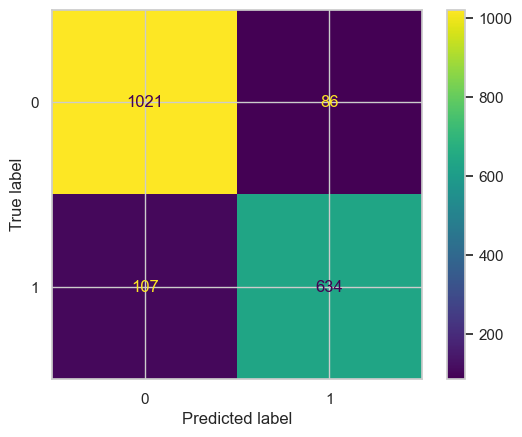

Mean Training Accuracy across 30 bootstraps: 0.9235254329004329
Mean Test Accuracy across 30 bootstraps: 0.8918470418470421
Mean Training Precision across 30 bootstraps: 0.9103330025315082
Mean Test Precision across 30 bootstraps: 0.8738126013784488
Mean Training Recall across 30 bootstraps: 0.8869621749408981
Mean Test Recall across 30 bootstraps: 0.8536212325686011
Mean Squared Error on Training Accuracy across 30 bootstraps: 0.005851720889515125
Mean Squared Error on Test Accuracy across 30 bootstraps: 0.011709706839576969
Mean Squared Error on Training Precision across 30 bootstraps: 0.008069220721863479
Mean Squared Error on Test Precision across 30 bootstraps: 0.015967151323103012
Mean Squared Error on Training Recall across 30 bootstraps: 0.012812027396341564
Mean Squared Error on Test Recall across 30 bootstraps: 0.021497738949262494
Cross-Validation Scores: [0.9168357  0.89993239 0.89039242 0.89918809 0.89242219]
Mean CV Score: 0.8997541585809818
Mean Squared Error on Holdout 

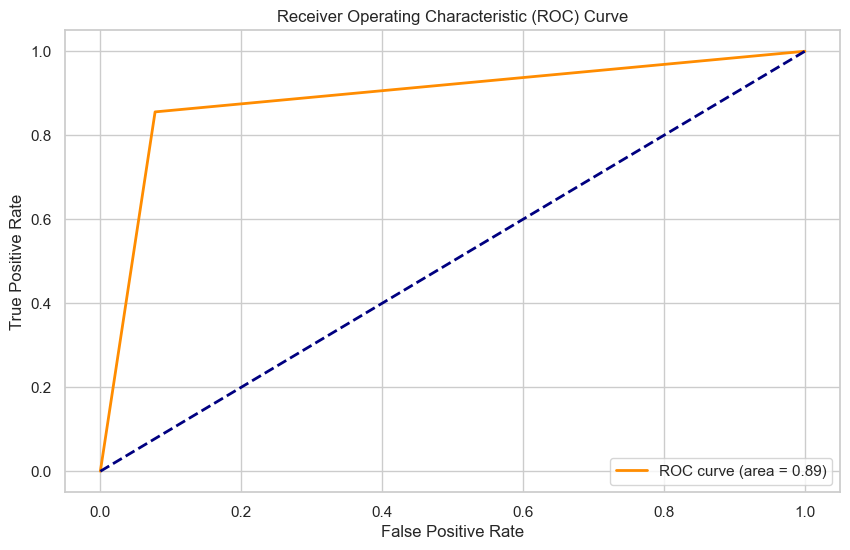

AUC-ROC: 0.8889565481349819


In [6]:
## XGBoost model

df = pd.read_csv('data/leads.csv')
# Drop Prospect ID and Lead Number for irrelevancy
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
df['TotalVisits'] = LabelEncoder().fit_transform(df['TotalVisits'])
df['Total Time Spent on Website'] = LabelEncoder().fit_transform(df['Total Time Spent on Website'])
df['Page Views Per Visit'] = LabelEncoder().fit_transform(df['Page Views Per Visit'])
df['Asymmetrique Activity Score'] = LabelEncoder().fit_transform(df['Asymmetrique Activity Score'])
df['Asymmetrique Profile Score'] = LabelEncoder().fit_transform(df['Asymmetrique Profile Score'])

target_variable = 'Converted'

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Convert non-numeric columns to numeric
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = pd.to_numeric(df_encoded[column], errors='coerce')

# Drop rows with missing values (NaNs) after conversion
df_encoded = df_encoded.dropna()

# Split the data into features and target variable
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='binary:logistic')

# Train the model on the training set
model.fit(X_train, y_train, eval_metric='logloss', eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=100)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
conf_matrix.plot()
plt.show()

## Bootstrapping

# Number of bootstrap samples
num_bootstraps = 30

# Initialize empty lists to store accuracy and recall values for training and test sets
train_accuracy_values = []
mse_train_accuracy_values = []
train_recall_values = []
mse_train_recall_values = []
test_accuracy_values = []
mse_test_accuracy_values = []
test_recall_values = []
mse_test_recall_values = []
train_precision_values = []
mse_train_precision_values = []
test_precision_values = []
mse_test_precision_values = []

# Bootstrap loop
for _ in range(num_bootstraps):
    # Create a bootstrap sample for training
    bootstrap_sample_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_bootstrap_train = X_train.iloc[bootstrap_sample_indices]
    y_bootstrap_train = y_train.iloc[bootstrap_sample_indices]

    model.fit(X_bootstrap_train, y_bootstrap_train)

    # Evaluate the model on the fixed training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    mse_train_accuracy = mean_squared_error([train_accuracy], [1])
    train_recall = recall_score(y_train, y_train_pred)
    mse_train_recall = mean_squared_error([train_recall], [1])
    train_accuracy_values.append(train_accuracy)
    mse_train_accuracy_values.append(mse_train_accuracy)
    train_recall_values.append(train_recall)
    mse_train_recall_values.append(mse_train_recall)
    train_precision = precision_score(y_train, y_train_pred)
    mse_train_precision = mean_squared_error([train_precision], [1])
    train_precision_values.append(train_precision)
    mse_train_precision_values.append(mse_train_precision)

    # Evaluate the model on the fixed test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    mse_test_accuracy = mean_squared_error([test_accuracy], [1])
    test_recall = recall_score(y_test, y_test_pred)
    mse_test_recall = mean_squared_error([test_recall], [1])
    test_accuracy_values.append(test_accuracy)
    mse_test_accuracy_values.append(mse_test_accuracy)
    test_recall_values.append(test_recall)
    mse_test_recall_values.append(mse_test_recall)
    test_precision = precision_score(y_test, y_test_pred)
    mse_test_precision = mean_squared_error([test_precision], [1])
    test_precision_values.append(test_precision)
    mse_test_precision_values.append(mse_test_precision)

# Calculate means for training and test sets
mean_train_accuracy = np.mean(train_accuracy_values)
mse_mean_train_accuracy = np.mean(mse_train_accuracy_values)
mean_train_recall = np.mean(train_recall_values)
mse_mean_train_recall = np.mean(mse_train_recall_values)
mean_test_accuracy = np.mean(test_accuracy_values)
mse_mean_test_accuracy = np.mean(mse_test_accuracy_values)
mean_test_recall = np.mean(test_recall_values)
mse_mean_test_recall = np.mean(mse_test_recall_values)
mean_train_precision = np.mean(train_precision_values)
mse_mean_train_precision = np.mean(mse_train_precision_values)
mean_test_precision = np.mean(test_precision_values)
mse_mean_test_precision = np.mean(mse_test_precision_values)


print(f"Mean Training Accuracy across {num_bootstraps} bootstraps: {mean_train_accuracy}")
print(f"Mean Test Accuracy across {num_bootstraps} bootstraps: {mean_test_accuracy}")
print(f"Mean Training Precision across {num_bootstraps} bootstraps: {mean_train_precision}")
print(f"Mean Test Precision across {num_bootstraps} bootstraps: {mean_test_precision}")
print(f"Mean Training Recall across {num_bootstraps} bootstraps: {mean_train_recall}")
print(f"Mean Test Recall across {num_bootstraps} bootstraps: {mean_test_recall}")
print(f"Mean Squared Error on Training Accuracy across {num_bootstraps} bootstraps: {mse_mean_train_accuracy}")
print(f"Mean Squared Error on Test Accuracy across {num_bootstraps} bootstraps: {mse_mean_test_accuracy}")
print(f"Mean Squared Error on Training Precision across {num_bootstraps} bootstraps: {mse_mean_train_precision}")
print(f"Mean Squared Error on Test Precision across {num_bootstraps} bootstraps: {mse_mean_test_precision}")
print(f"Mean Squared Error on Training Recall across {num_bootstraps} bootstraps: {mse_mean_train_recall}")
print(f"Mean Squared Error on Test Recall across {num_bootstraps} bootstraps: {mse_mean_test_recall}")

from sklearn.model_selection import StratifiedKFold, cross_val_score

## K-Fold CV

k_folds = 5
stratified_cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=stratified_cv, scoring='accuracy')

# Print or use the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

## Validation with holdout data set

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the holdout set
y_pred_holdout = model.predict(X_holdout)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the holdout set
mse_holdout = mean_squared_error(y_holdout, y_pred_holdout)
print(f'Mean Squared Error on Holdout Set: {mse_holdout}')

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error on Training Set: {mse_train}')

## Area under the curve/ROC

# Assuming 'y_true' contains true labels and 'y_scores' contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC-ROC:', roc_auc)

**CatBoost Model**

Training on fold [0/5]

bestTest = 0.2922012617
bestIteration = 74

Training on fold [1/5]

bestTest = 0.2422747442
bestIteration = 98

Training on fold [2/5]

bestTest = 0.2711802539
bestIteration = 90

Training on fold [3/5]

bestTest = 0.2654779765
bestIteration = 60

Training on fold [4/5]

bestTest = 0.3048878847
bestIteration = 94

0:	learn: 0.6081046	test: 0.6096860	best: 0.6096860 (0)	total: 19.3ms	remaining: 1.91s
99:	learn: 0.1893181	test: 0.2525959	best: 0.2517500 (85)	total: 2.13s	remaining: 0us

bestTest = 0.2517499544
bestIteration = 85

Shrink model to first 86 iterations.
Accuracy: 0.8983451536643026

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       203
           1       0.89      0.92      0.90       220

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.90      0.90      0.90       423



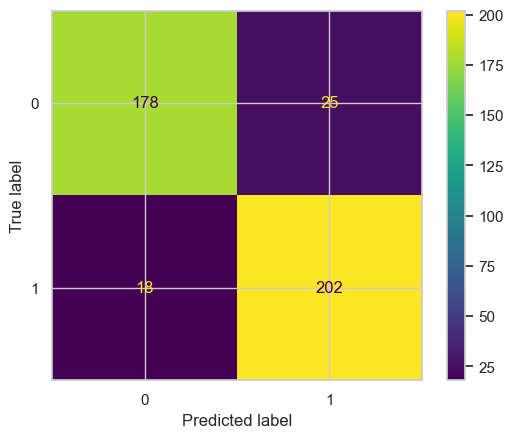


Overfitting Detector: 0.8585858585858586
Mean Training Accuracy across 30 bootstraps: 0.9229191321499016
Mean Test Accuracy across 30 bootstraps: 0.8931442080378251
Mean Training Precision across 30 bootstraps: 0.9297425662769264
Mean Test Precision across 30 bootstraps: 0.8884226889281635
Mean Training Recall across 30 bootstraps: 0.9391084093211753
Mean Test Recall across 30 bootstraps: 0.9090909090909093
Mean Squared Error on Training Accuracy across 30 bootstraps: 0.005968115028652124
Mean Squared Error on Test Accuracy across 30 bootstraps: 0.011494689700011364
Mean Squared Error on Training Precision across 30 bootstraps: 0.005009156048888185
Mean Squared Error on Test Precision across 30 bootstraps: 0.012661677040816862
Mean Squared Error on Training Recall across 30 bootstraps: 0.0037736436559433393
Mean Squared Error on Test Recall across 30 bootstraps: 0.008464187327823692
Cross-Validation Scores: [0.88757396 0.88757396 0.89053254 0.8964497  0.86390533]
Mean CV Score: 0.8852

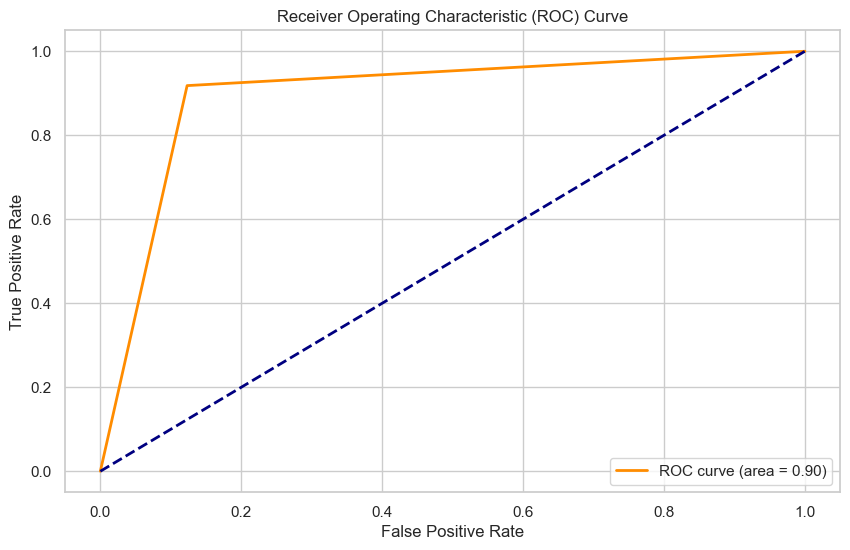

AUC-ROC: 0.8975145544111062


In [7]:
## CatBoost model

df = pd.read_csv('data/leads.csv')
# Drop Prospect ID and Lead Number for irrelevancy
df.dropna(inplace=True)
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
df['TotalVisits'] = LabelEncoder().fit_transform(df['TotalVisits'])
df['Total Time Spent on Website'] = LabelEncoder().fit_transform(df['Total Time Spent on Website'])
df['Page Views Per Visit'] = LabelEncoder().fit_transform(df['Page Views Per Visit'])
df['Asymmetrique Activity Score'] = LabelEncoder().fit_transform(df['Asymmetrique Activity Score'])
df['Asymmetrique Profile Score'] = LabelEncoder().fit_transform(df['Asymmetrique Profile Score'])

target_variable = 'Converted'

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Split the data into features and target variable
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost classifier
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=False, loss_function='Logloss', cat_features=categorical_features)

# Use cross-validation with the train-test split
cv_params = model.get_params()
cv_data = cv(Pool(X, y, cat_features=categorical_features), cv_params, fold_count=5)

# Train the model on the training set
model.fit(X_train, y_train, cat_features=categorical_features, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
conf_matrix.plot()
plt.show()

# Overfitting detector
overfitting_detector = model.get_best_iteration() / (cv_data.shape[0] - 1)

print(f"\nOverfitting Detector: {overfitting_detector}")

## Bootstrapping

# Number of bootstrap samples
num_bootstraps = 30

# Initialize empty lists to store accuracy and recall values for training and test sets
train_accuracy_values = []
mse_train_accuracy_values = []
train_recall_values = []
mse_train_recall_values = []
test_accuracy_values = []
mse_test_accuracy_values = []
test_recall_values = []
mse_test_recall_values = []
train_precision_values = []
mse_train_precision_values = []
test_precision_values = []
mse_test_precision_values = []

# Bootstrap loop
for _ in range(num_bootstraps):
    # Create a bootstrap sample for training
    bootstrap_sample_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_bootstrap_train = X_train.iloc[bootstrap_sample_indices]
    y_bootstrap_train = y_train.iloc[bootstrap_sample_indices]

    model.fit(X_bootstrap_train, y_bootstrap_train)

    # Evaluate the model on the fixed training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    mse_train_accuracy = mean_squared_error([train_accuracy], [1])
    train_recall = recall_score(y_train, y_train_pred)
    mse_train_recall = mean_squared_error([train_recall], [1])
    train_accuracy_values.append(train_accuracy)
    mse_train_accuracy_values.append(mse_train_accuracy)
    train_recall_values.append(train_recall)
    mse_train_recall_values.append(mse_train_recall)
    train_precision = precision_score(y_train, y_train_pred)
    mse_train_precision = mean_squared_error([train_precision], [1])
    train_precision_values.append(train_precision)
    mse_train_precision_values.append(mse_train_precision)

    # Evaluate the model on the fixed test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    mse_test_accuracy = mean_squared_error([test_accuracy], [1])
    test_recall = recall_score(y_test, y_test_pred)
    mse_test_recall = mean_squared_error([test_recall], [1])
    test_accuracy_values.append(test_accuracy)
    mse_test_accuracy_values.append(mse_test_accuracy)
    test_recall_values.append(test_recall)
    mse_test_recall_values.append(mse_test_recall)
    test_precision = precision_score(y_test, y_test_pred)
    mse_test_precision = mean_squared_error([test_precision], [1])
    test_precision_values.append(test_precision)
    mse_test_precision_values.append(mse_test_precision)

# Calculate means for training and test sets
mean_train_accuracy = np.mean(train_accuracy_values)
mse_mean_train_accuracy = np.mean(mse_train_accuracy_values)
mean_train_recall = np.mean(train_recall_values)
mse_mean_train_recall = np.mean(mse_train_recall_values)
mean_test_accuracy = np.mean(test_accuracy_values)
mse_mean_test_accuracy = np.mean(mse_test_accuracy_values)
mean_test_recall = np.mean(test_recall_values)
mse_mean_test_recall = np.mean(mse_test_recall_values)
mean_train_precision = np.mean(train_precision_values)
mse_mean_train_precision = np.mean(mse_train_precision_values)
mean_test_precision = np.mean(test_precision_values)
mse_mean_test_precision = np.mean(mse_test_precision_values)


print(f"Mean Training Accuracy across {num_bootstraps} bootstraps: {mean_train_accuracy}")
print(f"Mean Test Accuracy across {num_bootstraps} bootstraps: {mean_test_accuracy}")
print(f"Mean Training Precision across {num_bootstraps} bootstraps: {mean_train_precision}")
print(f"Mean Test Precision across {num_bootstraps} bootstraps: {mean_test_precision}")
print(f"Mean Training Recall across {num_bootstraps} bootstraps: {mean_train_recall}")
print(f"Mean Test Recall across {num_bootstraps} bootstraps: {mean_test_recall}")
print(f"Mean Squared Error on Training Accuracy across {num_bootstraps} bootstraps: {mse_mean_train_accuracy}")
print(f"Mean Squared Error on Test Accuracy across {num_bootstraps} bootstraps: {mse_mean_test_accuracy}")
print(f"Mean Squared Error on Training Precision across {num_bootstraps} bootstraps: {mse_mean_train_precision}")
print(f"Mean Squared Error on Test Precision across {num_bootstraps} bootstraps: {mse_mean_test_precision}")
print(f"Mean Squared Error on Training Recall across {num_bootstraps} bootstraps: {mse_mean_train_recall}")
print(f"Mean Squared Error on Test Recall across {num_bootstraps} bootstraps: {mse_mean_test_recall}")

from sklearn.model_selection import StratifiedKFold, cross_val_score

## K-Fold CV

k_folds = 5
stratified_cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=stratified_cv, scoring='accuracy')

# Print or use the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

## Validation with holdout data set

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the holdout set
y_pred_holdout = model.predict(X_holdout)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the holdout set
mse_holdout = mean_squared_error(y_holdout, y_pred_holdout)
print(f'Mean Squared Error on Holdout Set: {mse_holdout}')

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error on Training Set: {mse_train}')

## Area under the curve/ROC

# Assuming 'y_true' contains true labels and 'y_scores' contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC-ROC:', roc_auc)